In [2]:
import pubchempy as pcp
from pubchempy import get_synonyms
import pandas as pd
import re
from tqdm import tqdm
from utils import *
from kg_gen_4 import *
from matplotlib_venn import venn2,venn2_circles, venn2_unweighted
import matplotlib.pyplot as plt

In [6]:
bel = pd.read_excel('../data/misc/sherpa.xlsx')
kgg = pickle.load(open( "../data/kgs/ndd/depression/depression_dec7.pkl", "rb" ))


In [5]:
abs_no = len(set(list(bel['PubMedID'])))

In [6]:
edges = len(bel)
edges

43031

In [7]:
kgg.summarize

C:\Users\reagon.karki\Anaconda3\envs\kgs\lib\site-packages\pydantic\_internal\_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


Name,depression_dec7
Version,0.0.1
Nodes,15047
Namespaces,9
Edges,89531
Annotations,0
Citations,4
Authors,0
Components,273
Warnings,0
Network Density,0.000395


In [15]:
#works for all types of namespaces
def getEntityFromKG(mainGraph,namespaceType):
    
    entity_list = []
    
    for node in tqdm(mainGraph,desc='Filtering ' + namespaceType):
        
        if node.namespace == namespaceType:
            if node.name not in entity_list:
                entity_list.append(node.name)
                
    return(entity_list)

In [16]:
test = getEntityFromKG(kgg,'ChEMBL')

Filtering ChEMBL:   0%|          | 0/15047 [00:00<?, ?it/s]

In [20]:
# Function to extract entities from SHERPA output
def extract_chebi(df):
    
    chebi_list = []
    
    for item in tqdm(df['Subject'],desc='Parsing \'Subject\' Column'):
        if 'CHEBI' in item:
            #print(item)
            get_chebi = re.findall('CHEBI:[0-9]*',item)[0]
            chebi_list.append(get_chebi)
   
    for obj in tqdm(df['Object'],desc='Parsing \'Object\' Column'): 
        if 'CHEBI' in item:
            get_chebi = re.findall('CHEBI:[0-9]*',obj)[0]
            chebi_list.append(get_chebi)
    
    #print(len(chebi_list))
    chebi_list = list(set(chebi_list))
    return(chebi_list)
    

In [18]:
# Function to extract entities from pre-processed .bel files with entities already extracted
def extract_chebi(df):
    
    chebi_list = []
    
    for nspace, item in tqdm(zip(df['Subject_raw'],df['Subject'])):
    #for item in tqdm(df['Subject'],desc='Parsing \'Subject\' Column'):
        if 'CHEBI' in nspace:
            #print(nspace)
            #get_chebi = re.findall('CHEBI:[0-9]*',item)[0]
            chebi_list.append(item)
   
    #for obj in tqdm(df['Object'],desc='Parsing \'Object\' Column'): 
    for nspace, item in tqdm(zip(df['Object_raw'],df['Object'])):
        if 'CHEBI' in nspace:
            #get_chebi = re.findall('CHEBI:[0-9]*',obj)[0]
            chebi_list.append(item)
    
    #print(len(chebi_list))
    chebi_list = list(set(chebi_list))
    return(chebi_list)
    

In [21]:
chebi_list = extract_chebi(bel)

Parsing 'Subject' Column:   0%|          | 0/43031 [00:00<?, ?it/s]

Parsing 'Object' Column:   0%|          | 0/43031 [00:00<?, ?it/s]

In [22]:
len(chebi_list)

587

In [23]:
cid_list = []
for chebi in tqdm(chebi_list,desc='Fetching CIDs from CHEBI entries'):
    
    query_pubchem = pcp.get_compounds(chebi,'name')

    for entity in query_pubchem:
        cid = entity.cid
        if cid:
            #print(cid)
            cid_list.append(cid)
        

Fetching CIDs from CHEBI entries:   0%|          | 0/587 [00:00<?, ?it/s]

In [24]:
len(cid_list)

456

In [143]:
chembl_list = cid2chembl(cid_list)

Converting PubChem ids to ChEMBL ids:   0%|          | 0/454 [00:00<?, ?it/s]

In [144]:
len(set(chembl_list))

464

In [145]:
# pickle.dump(chembl_list, open("data/kgs/ndd/depression_dec7/chebi2chembl_dep.pkl", "wb"))

In [17]:
#cid_list = 454, chembl_list = 464
chembl_list = pickle.load(open( "../data/kgs/ndd/depression/chebi2chembl_dep.pkl", "rb" ))

In [38]:
#chembl_list = pickle.load(open("../data/kgs/ndd/depression/chebi2chembl_AD.pkl", "rb" ))

In [18]:
#Dep file
#use this function

def extract_hgnc(df):
    
    hgnc_list = []
    hgnc_final = []
    
    for item in tqdm(df['Subject'],desc='Parsing \'Subject\' Column'):
        if 'HGNC' in item:
            get_hgnc = item.split("! ")[1][:-1]
            hgnc_list.append(get_hgnc)
   
    for item in tqdm(df['Object'],desc='Parsing \'Object\' Column'):
        if 'HGNC' in item:
            get_hgnc = item.split("! ")[1][:-1]
            hgnc_list.append(get_hgnc)
    
    print(len(hgnc_list))
    
    for item in hgnc_list:
        
        #take care of instances -> 'NR3C1, pmod(go:0006468'
        if ',' in item:
            temp = item.split(',')[0]
            hgnc_final.append(temp)
        
        else: 
            hgnc_final.append(item)
        
    
    hgnc_final = list(set(hgnc_final))
    return(hgnc_final)
    

In [119]:
# Function to extract entities from pre-processed .bel files with entities already extracted
#use the above function
def extract_hgnc(df):
    
    hgnc_list = []
    
    for nspace, item in tqdm(zip(df['Subject_raw'],df['Subject'])):
    #for item in tqdm(df['Subject'],desc='Parsing \'Subject\' Column'):
        if 'HGNC' in nspace:
            #print(nspace)
            #get_chebi = re.findall('CHEBI:[0-9]*',item)[0]
            hgnc_list.append(item)
   
    #for obj in tqdm(df['Object'],desc='Parsing \'Object\' Column'): 
    for nspace, item in tqdm(zip(df['Object_raw'],df['Object'])):
        if 'HGNC' in nspace:
            #get_chebi = re.findall('CHEBI:[0-9]*',obj)[0]
            hgnc_list.append(item)
    
    #print(len(hgnc_list))
    hgnc_list = list(set(hgnc_list))
    return(hgnc_list)
    


In [147]:
bel.head(5)

,Subject,Relation,Object,Evidence,PubMedID
0,"a(CHEBI:50949 ! ""serotonin reuptake inhibitors"")",isA,"a(CHEBI:35469 ! ""Antidepressant drugs"")","Antidepressant drugs, including specific serot...",10023508
1,path(MESHD:D003863 ! depression),positiveCorrelation,"path(MESHD:D006973 ! ""elevated blood pressure"")",This study examined whether anxiety and depres...,10024070
2,"path(MESHD:D003863 ! ""depressive symptoms"")",positiveCorrelation,path(MESHD:D005356 ! fibromyalgia),An increase of depressive symptoms in fibromya...,10025092
3,path(MESHD:D005221 ! fatigue),positiveCorrelation,path(MESHD:D003863 ! depression),To determine the frequency and outcome of fati...,10025492
4,bp(GOBP:0007568 ! Aged),positiveCorrelation,"path(DO:1595 ! ""endogenous depression"")",Aged patients with endogenous depression had m...,10026377


In [19]:
hgnc_list = extract_hgnc(bel)

Parsing 'Subject' Column:   0%|          | 0/43031 [00:00<?, ?it/s]

Parsing 'Object' Column:   0%|          | 0/43031 [00:00<?, ?it/s]

6913


In [20]:
len(hgnc_list)

752

In [57]:
def extract_gobp(df):
    
    gobp_list = []
    gobp_final = []
    
    for item in tqdm(df['Subject'],desc='Parsing \'Subject\' Column'):
        if 'GOBP' in item:
            get_gobp = item.split("! ")[1][:-1]
            gobp_list.append(get_gobp)
   
    for item in tqdm(df['Object'],desc='Parsing \'Object\' Column'):
        if 'GOBP' in item:
            get_gobp = item.split("! ")[1][:-1]
            gobp_list.append(get_gobp)
    
    #print(len(gobp_list))
    
    gobp_list = list(set(gobp_list))
    #return(gobp_list)
    
    for item in gobp_list:
        
        item = item.upper()
        #take care of instances -> '"cognitive function"' -> ['', 'cognitive function', '']
        if '"' in item:
            #print(item)
            temp = item.split('"')[1] #take variable from 1st index from temp
            gobp_final.append(temp)
        
        else: 
            gobp_final.append(item)
        
    
    gobp_final = list(set(gobp_final))
    return(gobp_final)
    

In [65]:
# Function to extract entities from pre-processed .bel files with entities already extracted
def extract_gobp(df):
    
    gobp_list = []
    
    for nspace, item in tqdm(zip(df['Subject_raw'],df['Subject'])):
    #for item in tqdm(df['Subject'],desc='Parsing \'Subject\' Column'):
        if 'GO:' in nspace:
            #print(nspace)
            #get_chebi = re.findall('CHEBI:[0-9]*',item)[0]
            gobp_list.append(item)
   
    #for obj in tqdm(df['Object'],desc='Parsing \'Object\' Column'): 
    for nspace, item in tqdm(zip(df['Object_raw'],df['Object'])):
        if 'GO:' in nspace:
            #get_chebi = re.findall('CHEBI:[0-9]*',obj)[0]
            gobp_list.append(item)
    
    print(len(gobp_list))
    gobp_list = list(set(gobp_list))
    return(gobp_list)
    

In [58]:
gobp_list = extract_gobp(bel)

Parsing 'Subject' Column:   0%|          | 0/43031 [00:00<?, ?it/s]

Parsing 'Object' Column:   0%|          | 0/43031 [00:00<?, ?it/s]

In [59]:
len(gobp_list)

247

In [153]:
gobp_list

['MENOPAUSAL SYMPTOM',
 'SIGNALING PATHWAY',
 'SLEEPING',
 'ULTRADIAN RHYTHM',
 'INNATE IMMUNE ACTIVATION',
 'MASTICATORY',
 'SHORT-TERM MEMORY',
 'BONE MINERALIZATION',
 'COGNITIVE PROCESSING',
 'EJACULATION',
 'EXCITATORY',
 'HEDGEHOG PATHWAY',
 'PRE-MENOPAUSAL',
 'CIRCADIAN BIOLOGY',
 'AGED',
 'STARTLE RESPONSE',
 'COGNITIVE ABILITY',
 'WNT',
 'MITOCHONDRIAL ELECTRON TRANSPORT CHAIN',
 'CIRCADIAN',
 'NERVE CONDUCTION',
 'CIRCADIAN CLOCKS',
 'BODILY SENSATIONS',
 'POSTMENOPAUSE',
 'FATTY ACID METABOLISM',
 'MIGRATION',
 'MUSCULAR HYPERTROPHY',
 'URGENCY',
 'SLEEP BEHAVIOR',
 'COGNITIVE',
 'PHOTOPERIODS',
 'DIFFERENTIATION',
 'BREAST DEVELOPMENT',
 'RNAI-MEDIATED KNOCKDOWN',
 'NEURODEVELOPMENT',
 'NEURONAL ACTIVITY',
 'NEUROGENESIS',
 'COGNITIVE BEHAVIOR',
 'SLEEP-WAKE CYCLE',
 'VISION',
 'MENTAL FUNCTIONS',
 'INHIBITORY',
 'SOCIAL BEHAVIORS',
 'CO-EXPRESSION',
 'SIGNALING CASCADE',
 'COGNITIVE FUNCTIONING',
 'ETC',
 'SIGNALING PATHWAYS',
 'MENOPAUSAL',
 'POSTMENOPAUSAL',
 'SOCIAL BEH

In [25]:
kgg_chem = getChemfromKG(kgg)

Filtering Chemicals:   0%|          | 0/89531 [00:00<?, ?it/s]

In [156]:
len(kgg_chem)

108

In [27]:
kgg_prot = getProtfromKG(kgg)

Filtering Proteins/Genes:   0%|          | 0/89531 [00:00<?, ?it/s]

In [158]:
len(kgg_prot)

2429

In [28]:
def getGOBPfromKG(mainGraph):

    prot_list = []
    for u, v, data in tqdm(mainGraph.edges(data=True),desc='Filtering Proteins/Genes'):
        
        if 'GOBP' in u.namespace:
            if u.name not in prot_list:
                prot_list.append(u.name)

        if 'GOBP' in v.namespace:
            if v.name not in prot_list:
                prot_list.append(v.name)
                
    return(prot_list)


In [79]:
def getEntityFromKG(mainGraph,namespaceType):
    
    entity_list = []
    
    for u, v, data in tqdm(mainGraph.edges(data=True),desc='Filtering ' + namespaceType):
        
        if namespaceType in u.namespace:
            if u.name not in entity_list:
                entity_list.append(u.name)

        if namespaceType in v.namespace:
            if v.name not in entity_list:
                entity_list.append(v.name)
                
    return(entity_list)
    

In [60]:
kgg_prot = getEntityFromKG(kgg,'HGNC')
len(kgg_prot)

Filtering HGNC:   0%|          | 0/15047 [00:00<?, ?it/s]

2429

In [61]:
kgg_chem = getEntityFromKG(kgg,'ChEMBL')
len(kgg_chem)

Filtering ChEMBL:   0%|          | 0/15047 [00:00<?, ?it/s]

108

In [62]:
kgg_gobp = getEntityFromKG(kgg,'GOBP')
len(kgg_gobp)

Filtering GOBP:   0%|          | 0/15047 [00:00<?, ?it/s]

6875

In [63]:
kgg_gobp

['adenylate cyclase-activating G protein-coupled receptor signaling pathway',
 'adenylate cyclase-inhibiting G protein-coupled receptor signaling pathway',
 'adult locomotory behavior',
 'amyloid fibril formation',
 'antibacterial humoral response',
 'amyloid precursor protein catabolic process',
 'amyloid precursor protein metabolic process',
 'amyloid-beta formation',
 'amyloid-beta metabolic process',
 'apoptotic signaling pathway',
 'brain development',
 'calcium ion homeostasis',
 'calcium ion transmembrane import into cytosol',
 'chemical synaptic transmission',
 'excitatory chemical synaptic transmission',
 'axon extension',
 'axonogenesis',
 'behavioral response to cocaine',
 'calcium ion import',
 'cell division',
 'calcium ion transport',
 'intracellular signal transduction',
 'adaptive thermogenesis',
 'cell migration',
 'diet induced thermogenesis',
 'endosome to plasma membrane protein transport',
 'insulin receptor recycling',
 'AMPA glutamate receptor clustering',
 'arte

In [64]:
len(gobp_list)

247

In [65]:
gobp_list

['POST-MENOPAUSAL',
 'SYNAPTOGENESIS',
 'SOCIAL BEHAVIOR',
 'MENOPAUSAL',
 'GENE CO-EXPRESSION',
 'PROMOTER METHYLATION',
 'COGNITIVE STRATEGIES',
 'PREMENOPAUSAL',
 'COGNITIVE TASKS',
 'REPRODUCTIVE FUNCTION',
 'WAKING',
 'MENOPAUSAL SYMPTOMS',
 'FIBRINOLYSIS',
 'CIRCADIAN RHYTHM',
 'METHYLATION',
 'LACTATING',
 'PROLIFERATION',
 'LEARNING',
 'OCTOGENARIANS',
 'NEUROTRANSMITTER REUPTAKE',
 'FERROPTOSIS',
 'URGENCY',
 'SLEEP PATTERNS',
 'SIGNALING CASCADE',
 'ERECTILE FUNCTION',
 'BODY AWARENESS',
 'SLEEPING PATTERNS',
 'CLIMACTERIUM',
 'REPRODUCTIVE',
 'MITOPHAGY',
 'TARGETING',
 'COGNITIVE FACTORS',
 'BALANCE',
 'PATHWAYS',
 'NEURAL DEVELOPMENT',
 'SOCIABILITY',
 'AGING-RELATED',
 'STARTLE REFLEX',
 'RHYTHMICITY',
 'CIRCADIAN REGULATION',
 'LIFE PROCESSES',
 'HEMATOPOIESIS',
 'FAST-SPIKING',
 'CIRCADIAN BIOLOGY',
 'AGEING',
 'SLEEP BEHAVIOR',
 'CIRCADIAN RHYTHMICITY',
 'ANGIOGENESIS',
 'MENSTRUAL CYCLE',
 'RECEPTIVE',
 'OLDER AGE',
 'GENE METHYLATION',
 'VASOCONSTRICTION',
 'ANGIOGEN

In [66]:
kgg_gobp_upper

['ARGININE CATABOLIC PROCESS',
 'CELL REDOX HOMEOSTASIS',
 'CELLULAR RESPONSE TO LIPOPOLYSACCHARIDE',
 'CELLULAR RESPONSE TO TYPE II INTERFERON',
 'CELLULAR RESPONSE TO XENOBIOTIC STIMULUS',
 'CIRCADIAN RHYTHM',
 'DEFENSE RESPONSE TO BACTERIUM',
 'DEFENSE RESPONSE TO GRAM-NEGATIVE BACTERIUM',
 'INFLAMMATORY RESPONSE',
 'INNATE IMMUNE RESPONSE IN MUCOSA',
 'NEGATIVE REGULATION OF BLOOD PRESSURE',
 'NEGATIVE REGULATION OF GENE EXPRESSION',
 'NEGATIVE REGULATION OF PROTEIN CATABOLIC PROCESS',
 'NITRIC OXIDE BIOSYNTHETIC PROCESS',
 'NITRIC OXIDE MEDIATED SIGNAL TRANSDUCTION',
 'PEPTIDYL-CYSTEINE S-NITROSYLATION',
 'POSITIVE REGULATION OF INTERLEUKIN-6 PRODUCTION',
 'POSITIVE REGULATION OF INTERLEUKIN-8 PRODUCTION',
 'POSITIVE REGULATION OF KILLING OF CELLS OF ANOTHER ORGANISM',
 'POSITIVE REGULATION OF LEUKOCYTE MEDIATED CYTOTOXICITY',
 'PROSTAGLANDIN SECRETION',
 'REGULATION OF CELL POPULATION PROLIFERATION',
 'REGULATION OF CELLULAR RESPIRATION',
 'REGULATION OF CYTOKINE PRODUCTION INVOL

In [67]:
#necessary for Depression KG from SCAI
kgg_gobp_upper = []
for item in kgg_gobp:
    temp = item.upper()
    kgg_gobp_upper.append(temp)
    

In [68]:
len(kgg_gobp_upper)

6875

In [166]:
shared_chem = [x for x in chembl_list if x in kgg_chem]
len(shared_chem)

60

In [175]:
len(chembl_list)

464

In [45]:
len(gobp_list)

247

In [69]:
shared_gobp = [x for x in gobp_list if x in kgg_gobp_upper]
#shared_gobp = [x for x in gobp_list if x in kgg_gobp]
len(shared_gobp)

42

In [172]:
len(hgnc_list)

752

In [173]:
shared_hgnc = [x for x in hgnc_list if x in kgg_prot]
len(shared_hgnc)


#prot
# scai_ad = 1023, kgg = 1742, shared =  313

#chem
# scai_ad = 377, kgg = 254, shared = 29

#gobp
# scai_ad = 445, kgg = 1707, shared = 126

462

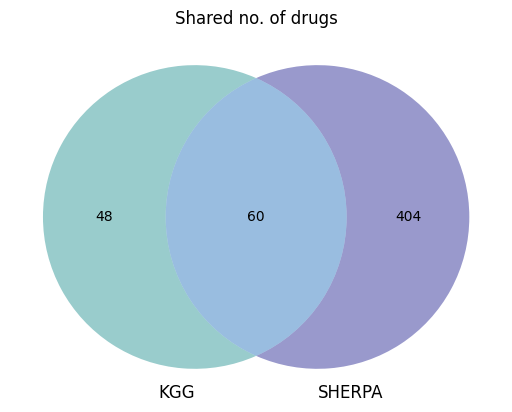

In [38]:
#venn diagrams

#shared drugs

venn2_unweighted([set(kgg_chem),set(chembl_list)], set_colors=('teal', 'navy'), set_labels = ('KGG','SHERPA'))
plt.title("Shared no. of drugs")
plt.savefig('../data/kgs/ndd/depression/shared_drugs.png',dpi = 500)
plt.show()

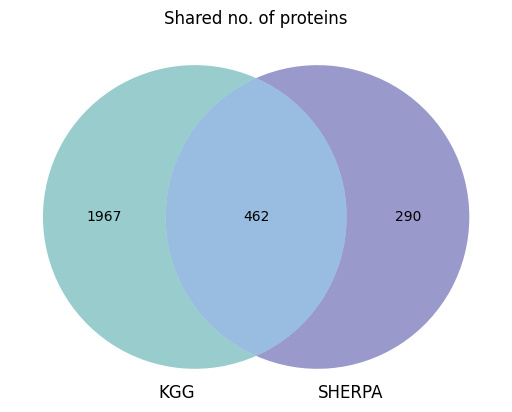

In [40]:
#shared proteins
venn2_unweighted([set(kgg_prot),set(hgnc_list)], set_colors=('teal', 'navy'), set_labels = ('KGG','SHERPA'))
plt.title("Shared no. of proteins")
plt.savefig('../data/kgs/ndd/depression/shared_proteins.png',dpi = 500)
plt.show()

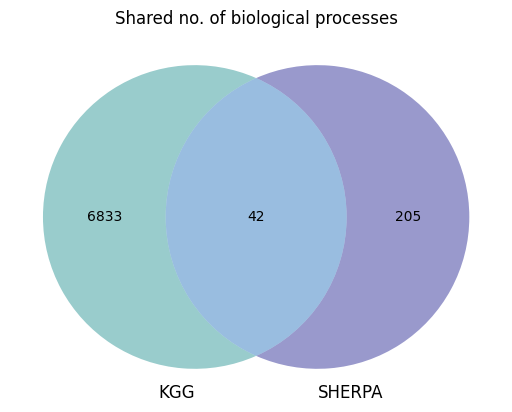

In [43]:
#shared proteins
venn2_unweighted([set(kgg_gobp_upper),set(gobp_list)], set_colors=('teal', 'navy'), set_labels = ('KGG','SHERPA'))
plt.title("Shared no. of biological processes")
plt.savefig('../data/kgs/ndd/depression/shared_bps.png',dpi = 500)
plt.show()

In [ ]:
#####

In [ ]:
prot_score = pd.read_csv('../data/kgs/ndd/depression/diseaseAssociatedProteins.csv')

In [ ]:
prot_score

In [ ]:
shared_hgnc_score = prot_score[prot_score['Protein'].isin(shared_hgnc)]

In [ ]:
shared_hgnc_score

In [ ]:
hgnc_list_score = prot_score[prot_score['Protein'].isin(hgnc_list)]

In [ ]:
hgnc_list_score

In [59]:
shared_chem = [x for x in chembl_list if x in kgg_chem]
len(shared_chem)

29

In [ ]:
xx = pybel.from_bel_script('../data/kgs/ndd/epilepsy.bel.txt')

In [ ]:
xx = pybel.from_bel_script('C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/alzheimers.bel')

In [ ]:
xx = pybel.load('C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/alzheimers.bel')

In [ ]:
pybel.to_jupyter(xx)

In [36]:
output = 'C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/triples.txt'

In [53]:
#i=0
filename = 'C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/alzheimers.bel'
#output = 'C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/triples.txt'
#types_of_encoding = ["utf8", "cp1252"]
temp_list = []
with open (filename,'r', encoding = 'utf-8') as f:
    for line in f:
        #print(line)
        if line.startswith('a(') or line.startswith('p(') or line.startswith('act(') or line.startswith('path(') or line.startswith('complex(') or line.startswith('r(') or line.startswith('bp(') or line.startswith('composite(') or line.startswith('m(') or line.startswith('rxn('):
            #print(line)
            #i+=1
            #print(i) 
            
            #remove \n from triples
            line = line.split('\n') 
            
            temp = [line[0]]
            
            with open(output,'a') as fn:
                for i in temp:
                    fn.write(str(i) + '\n')
        

            #temp_list.append(temp)
                


In [94]:
rel_type = [' eq ',' equivalentTo ',' isA ',' -| ',' -- ' ,' -> ',' negativeCorrelation ',' positiveCorrelation ',' pos ',' neg ',' => ',' =| ',' reg ',' hasMembers ',' hasComponents ']
filename = 'C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/alzheimers.bel'
#output = 'C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/triples.txt'
#types_of_encoding = ["utf8", "cp1252"]
temp_list = []
with open (filename,'r', encoding = 'utf-8') as f:
    for line in f:
        #print(line)
        if line.startswith('a(') or line.startswith('p(') or line.startswith('act(') or line.startswith('path(') or line.startswith('complex(') or line.startswith('r(') or line.startswith('bp(') or line.startswith('composite(') or line.startswith('m(') or line.startswith('rxn('):
            #print(line)
            #i+=1
            #print(i) 
            
            #remove \n from triples
            line = line.split('\n') 
            
            temp = line[0]
            #print(temp)
            
            
            for item in rel_type:
                if item in temp:
                    temp_partition = list(temp.partition(item))
                    temp_list.append(temp_partition)
#                     print(temp_partition)
#                     break
#                 break
            
# #             xx = list(temp.partition('eq')) 
# #             print(xx)
            
# #             break
            



In [50]:
with open(output,'w') as fn:
    for i in temp_list:
        fn.write(str(i) + '\n')
        

In [99]:
test = pd.DataFrame(temp_list,columns=['Subject','Relation','Object'])

In [100]:
test.head(5)

,Subject,Relation,Object
0,"a(CHEBI:""amyloid-beta polypeptide 40"")",eq,"p(HGNC:APP, frag(""672_711""))"
1,"a(CHEBI:""amyloid-beta polypeptide 40"")",isA,"a(CHEBI:""amyloid-beta"")"
2,"p(HGNC:APP, frag(""672_711""))",isA,"a(CHEBI:""amyloid-beta"")"
3,"a(CHEBI:""amyloid-beta polypeptide 42"")",eq,"p(HGNC:APP, frag(""672_713""))"
4,"a(CHEBI:""amyloid-beta polypeptide 42"")",isA,"a(CHEBI:""amyloid-beta"")"


In [101]:
test.to_excel('C:/Users/reagon.karki/Documents/ITMP/BY-COVID/KGG/SCAI/triples.xlsx')

In [63]:
a = 'p(HGNC:APP, frag("672_711")) isA a(CHEBI:"amyloid-beta")'

In [64]:
a.split('isA')

['p(HGNC:APP, frag("672_711")) ', ' a(CHEBI:"amyloid-beta")']

In [62]:
a.strip('isA')

'p(HGNC:APP, frag("672_711")) isA a(CHEBI:"amyloid-beta")'

In [67]:
aa = a.partition('isA')

In [71]:
aa

('p(HGNC:APP, frag("672_711")) ', 'isA', ' a(CHEBI:"amyloid-beta")')

In [72]:
aa = list(aa)

In [73]:
aa

['p(HGNC:APP, frag("672_711")) ', 'isA', ' a(CHEBI:"amyloid-beta")']

# PDB structures for Depression proteins in clinical trial phases

In [7]:
chem = pd.read_csv('../data/kgs/ndd/depression/diseaseAssociatedDrugs.csv',index_col=0)
prot = pd.read_csv('../data/kgs/ndd/depression/diseaseAssociatedProteins.csv',index_col=0)

In [8]:
len(prot['UniProt'])

2074

In [233]:
len(set(chem['drugId']))

109

In [180]:
chem = pd.merge(chem,prot[['Protein','UniProt']], left_on ='approvedSymbol', right_on= 'Protein', how='left')

In [181]:
chem.head()

,approvedSymbol,approvedName,prefName,drugType,drugId,phase,ctIds,id,disease,Protein,UniProt
0,SLC6A4,solute carrier family 6 member 4,NORTRIPTYLINE HYDROCHLORIDE,Small molecule,CHEMBL1201156,4.0,[],EFO_0003761,unipolar depression,SLC6A4,P31645
1,DRD5,dopamine receptor D5,AMOXAPINE,Small molecule,CHEMBL1113,4.0,[],EFO_0003761,unipolar depression,DRD5,P21918
2,GSK3B,glycogen synthase kinase 3 beta,LITHIUM CARBONATE,Small molecule,CHEMBL1200826,4.0,[],EFO_0003761,unipolar depression,GSK3B,P49841
3,GRIN2C,glutamate ionotropic receptor NMDA type subuni...,ESKETAMINE,Small molecule,CHEMBL395091,4.0,['NCT05698394'],EFO_0003761,unipolar depression,GRIN2C,Q14957
4,GRIN3B,glutamate ionotropic receptor NMDA type subuni...,ESKETAMINE,Small molecule,CHEMBL395091,4.0,['NCT05698394'],EFO_0003761,unipolar depression,GRIN3B,O60391


In [185]:
def ExtractFromUniProt_PDB(uniprot_id) -> dict:
    """Uniprot parser to retrieve information about OMIM disease, reactome pathway, biological process,
     and molecular functions.

    :param uniprot_id:
    :return:
    """
    Uniprot_Dict = []

    mapped_uprot = []

    for id in tqdm(uniprot_id, desc='Fetching Protein-related info'):

        # Retrieve data for id in text format if found in uniprot
        ret_uprot = requests.get(
            'https://www.uniprot.org/uniprot/' + id + '.txt'
        ).text.split('\n')
        
        #return(ret_uprot)

        if ret_uprot == ['']:
            continue

        id_copy = id
        mapped_uprot.append(id_copy)
        
        #counters for bf and bp
        #i = 0
        #j = 0
        k = 0
        id = {}
        id['PDB'] = {}
        id['Gene'] = {}
        id['Total_PDBs'] = {}
        id['Total_xrayStructures'] = {}
        temp = []
        temp_xray = []
        #id['Reactome'] = {}


        # parse each line looking for info about disease, pathway, funcn, bp and so on
        for line in ret_uprot:
            #temp = []
        
        
            if 'GN   Name' in line:
                if k == 0:
                    gene = line.split('=')
                    gene = gene[1].split(' ')
                    if ';' in gene[0]:
                        gene = gene[0].split(';')
                        gene = {'Gene': gene[0]}
                    else:
                        gene = {'Gene': gene[0]}
                    id.update(gene)
                    k += 1
                    
            if 'PDB;' in line:
                
                pdb_split = line.split(';')
                #print(pdb_split)
                #break
                pdb = pdb_split[1][1:]
                #print(pdb)
                temp.append(pdb)
                
                if ' X-ray' in pdb_split:
                    temp_xray.append(pdb)

        id['PDB'] = temp
        id['Total_PDBs'] = len(temp)
        id['Total_xrayStructures'] = len(temp_xray)
               #print(id)
                #return(pdb)
                

        Uniprot_Dict.append(id)

    Uniprot_Dict = dict(zip(mapped_uprot, Uniprot_Dict))

    return Uniprot_Dict

In [234]:
#V2

def ExtractFromUniProt_PDB(uniprot_id) -> dict:
    """Uniprot parser to retrieve information about OMIM disease, reactome pathway, biological process,
     and molecular functions.

    :param uniprot_id:
    :return:
    """
    Uniprot_Dict = []

    mapped_uprot = []

    for id in tqdm(uniprot_id, desc='Fetching Protein-related info'):

        # Retrieve data for id in text format if found in uniprot
        ret_uprot = requests.get(
            'https://www.uniprot.org/uniprot/' + id + '.txt'
        ).text.split('\n')
        
        #return(ret_uprot)

        if ret_uprot == ['']:
            continue

        id_copy = id
        mapped_uprot.append(id_copy)
        
        #counters for bf and bp
        #i = 0
        #j = 0
        k = 0
        id = {}
        id['PDB'] = {}
        id['Gene'] = {}
        id['Total_PDBs'] = {}
        id['Xray_structures'] = {}
        id['Total_xrayStructures'] = {}
        temp = []
        temp_xray = []
        #id['Reactome'] = {}


        # parse each line looking for info about disease, pathway, funcn, bp and so on
        for line in ret_uprot:
            #temp = []
        
        
            if 'GN   Name' in line:
                if k == 0:
                    gene = line.split('=')
                    gene = gene[1].split(' ')
                    if ';' in gene[0]:
                        gene = gene[0].split(';')
                        gene = {'Gene': gene[0]}
                    else:
                        gene = {'Gene': gene[0]}
                    id.update(gene)
                    k += 1
                    
            if 'PDB;' in line:
                
                pdb_split = line.split(';')
                #print(pdb_split)
                #break
                pdb = pdb_split[1][1:]
                #print(pdb)
                temp.append(pdb)
                
                if ' X-ray' in pdb_split:
                    temp_xray.append(pdb)

        id['PDB'] = temp
        id['Total_PDBs'] = len(temp)
        id['Xray_structures'] = temp_xray
        id['Total_xrayStructures'] = len(temp_xray)
               #print(id)
                #return(pdb)
                

        Uniprot_Dict.append(id)

    Uniprot_Dict = dict(zip(mapped_uprot, Uniprot_Dict))

    return Uniprot_Dict

In [226]:
prot_list = list(set(chem['UniProt']))

In [236]:
len(prot_list)

91

In [235]:
#full prot list
prot_list2pdb = ExtractFromUniProt_PDB(list(prot['UniProt']))

Fetching Protein-related info:   0%|          | 0/2074 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [57]:
len(prot_list2pdb)

2069

In [255]:
#prots in CT
prot_list2pdb = ExtractFromUniProt_PDB(prot_list)

Fetching Protein-related info:   0%|          | 0/91 [00:00<?, ?it/s]

In [256]:
df_final = pd.DataFrame(prot_list2pdb)

In [257]:
df_final = df_final.transpose()
df_final = df_final.rename_axis('UniProt').reset_index()


In [265]:
df_final.head()

,UniProt,PDB,Gene,Total_PDBs,Xray_structures,Total_xrayStructures
0,P49286,"[6ME6, 6ME7, 6ME8, 6ME9, 7VH0]",MTNR1B,5,"[6ME6, 6ME7, 6ME8, 6ME9]",4
1,P31644,"[5O8F, 5OJM, 6A96, 8BEJ, 8BGI, 8BHA, 8BHB, 8BH...",GABRA5,15,"[5O8F, 5OJM, 8BGI, 8BHG]",4
2,Q01959,[],SLC6A3,0,[],0
3,P25100,[],ADRA1D,0,[],0
4,P28222,"[4IAQ, 4IAR, 5V54, 6G79, 7C61]",HTR1B,5,"[4IAQ, 4IAR, 5V54, 7C61]",4


In [266]:
len(df_final)

91

In [260]:
df_final.to_csv('../data/kgs/ndd/depression/pdb_structures_v2.csv')

In [9]:
df_final = pd.read_csv('../data/kgs/ndd/depression/pdb_structures.csv')

In [10]:
df_PDB_yes = df_final.loc[df_final['Total_PDBs'] > 0]
df_PDB_yes = df_PDB_yes.reset_index(drop=True)

In [11]:
len(df_PDB_yes)

71

In [272]:
df_PDB_xray = df_final.loc[df_final['Total_xrayStructures'] > 0]
df_PDB_xray = df_PDB_xray.reset_index(drop=True)
len(df_PDB_xray)

48

In [273]:
df_PDB_no = df_final.loc[df_final['Total_PDBs']==0]
df_PDB_no = df_PDB_no.reset_index(drop=True)

In [274]:
len(df_PDB_no)

20

In [214]:
cols = ['UniProt','PDB_ids','Protein','Total_PDBs','Total_xrayStructures']

In [275]:
df_stacked_barplot = pd.DataFrame()
protein = [len(prot_list), len(prot) - len(prot_list)]
pdb = [len(df_PDB_yes),len(df_PDB_no)]
xray = [len(df_PDB_xray),len(df_PDB_yes)-len(df_PDB_xray)]

In [277]:
df_stacked_barplot = pd.DataFrame([protein,pdb,xray],columns=['Yes','No'])

In [281]:
df_stacked_barplot.index = ['Proteins in CT', 'CT Proteins in PDB', 'CT Proteins with X-ray']

In [282]:
df_stacked_barplot

,Yes,No
Proteins in CT,91,1983
CT Proteins in PDB,71,20
CT Proteins with X-ray,48,23


In [283]:
df_stacked_barplot.to_csv('../data/kgs/ndd/depression/protein_num.csv')

In [9]:
df = pd.read_csv('../data/kgs/ndd/depression/protein_num.csv',index_col=0)

In [11]:
df

,Yes,No
Proteins in CT,91,1983
CT Proteins in PDB,71,20
CT Proteins with X-ray,48,23


In [10]:
# Normalize the data row wise
df_norm = df.div(df.sum(axis=1), axis=0)
df_norm = df_norm.round(2)
df_norm

,Yes,No
Proteins in CT,0.04,0.96
CT Proteins in PDB,0.78,0.22
CT Proteins with X-ray,0.68,0.32


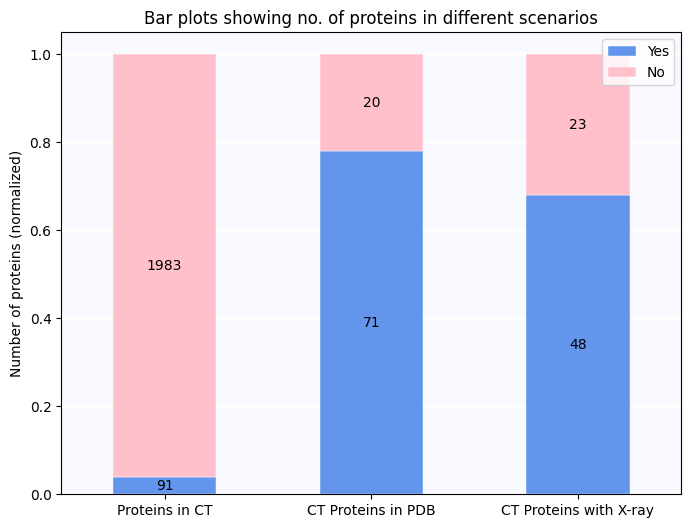

In [14]:
ax = df_norm.plot(kind="bar", stacked=True, color=["cornflowerblue", "pink"],
                  rot=0, figsize = [8,6], linewidth=0.3, edgecolor='white')

plt.title("Bar plots showing no. of proteins in different scenarios")
plt.ylabel("Number of proteins (normalized)")
ax.set_facecolor("ghostwhite")
ax.set_axisbelow(True)
ax.yaxis.grid(color='white', linewidth = 2)

# display values on top of bars
for i, c in enumerate(ax.containers):
    if i == 0:
        labels = df["Yes"].values.tolist()
    else:
        labels = df["No"].values.tolist()

    # Optional: if the segment is small or 0, customize the labels
    # labels = [v.get_height() if v.get_height() > 0 else "" for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels = labels, label_type = "center")

    
plt.show()



#path = '../data/kgs/ndd/depression/CTproteins.png'

#ax.get_figure().savefig(path, format='png', dpi = 600)